In [1]:
import sklearn
from sklearn import svm
import numpy as np
from numpy import ma
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names =['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df = pd.read_csv('train.csv',header=None,sep=",",names=names, encoding = "ISO-8859-1")

df['toxic_score'] = df[['toxic','severe_toxic','obscene', 'threat', 'insult', 'identity_hate']].max(axis=1)
#drop unnecessary columns
df = df.drop(['id', 'toxic','severe_toxic','obscene', 'threat', 'insult', 'identity_hate'], axis=1)
#drop first row
df.drop(df.index[:1], inplace=True)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
bad_words = []
negative_file = open("negative-words.txt", "r")
for line in negative_file:
    bad_words.append(line.strip("\n"))
negative_file.close()
profanity_file = open("profanity-words.txt", "r")
for line in profanity_file:
    if (line.strip("\n") not in bad_words):
        bad_words.append(line.strip("\n"))
profanity_file.close()

In [4]:
data = df.values

X = data[:,0].reshape((159571,1))
Y = data[:,1].reshape((159571,1))

toxic_count = 0
not_toxic_count = 0
val_toxic = 0
val_not_toxic = 0

X_tr = []
Y_tr = []
X_val = []
Y_val = []

data_size = 3000

for index in range(0,159571):
    if ((int(Y[index][0]) == 1 and toxic_count < 0.5 * data_size) or 
        (int(Y[index][0]) == 0 and not_toxic_count < 0.5 * data_size)):
        Y_tr.append(int(Y[index][0]))
        X_tr.append(X[index][0])
        if (int(Y[index][0]) == 1):
            toxic_count += 1
        else:
            not_toxic_count += 1
    if toxic_count == 0.5 * data_size and not_toxic_count == 0.5 * data_size:
        if ((int(Y[index][0]) == 1 and val_toxic < 0.5 * data_size) or 
            (int(Y[index][0]) == 0 and val_not_toxic < 0.5 * data_size)):
            Y_val.append(int(Y[index][0]))
            X_val.append(X[index][0])
            if (int(Y[index][0]) == 1):
                val_toxic += 1
            else:
                val_not_toxic += 1
        if val_toxic + val_not_toxic == data_size:
            break

# X_tr = np.array(X_tr).reshape((15000, 1))
Y_train = np.array(Y_tr).reshape((data_size, 1))
Y_test = np.array(Y_val).reshape((data_size, 1))


cv = sklearn.feature_extraction.text.CountVectorizer(vocabulary=bad_words)
X_train = cv.fit_transform(X_tr).toarray()
X_test = cv.fit_transform(X_val).toarray()

print(X_train, X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# SVM Code

In [5]:
def svm_machine_run(c, kernel_type):
    svc = None
    if kernel_type == "linear":
        svc = svm.SVC(probability=False, kernel=kernel_type, C=c)
    else:
        svc = svm.SVC(probability=False, kernel=kernel_type, C=c, gamma='auto')
    
    svc.fit(X_train, Y_train.ravel())
    
    Yhat_train = svc.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train.ravel())
    
    Yhat_test = svc.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test.ravel())
    
    return acc_train, acc_test

In [6]:
c = 1
# linear kernel
acc_linear_train, acc_linear_test = svm_machine_run(c, 'linear')
# rbf kernel
acc_rbf_train, acc_rbf_test = svm_machine_run(c, 'rbf')
# poly kernel
acc_poly_train, acc_poly_test = svm_machine_run(c, 'poly')
# sigmoid kernel
acc_sigmoid_train, acc_sigmoid_test = svm_machine_run(c, 'sigmoid')

print("Linear SVM")
print("Training accuracy:", acc_linear_train)
print("Test accuracy:", acc_linear_test)
print("RBF SVM")
print("Training accuracy:", acc_rbf_train)
print("Test accuracy:", acc_rbf_test)
print("Polynomial SVM")
print("Training accuracy:", acc_poly_train)
print("Test accuracy:", acc_poly_test)
print("Sigmoid SVM")
print("Training accuracy:", acc_sigmoid_train)
print("Test accuracy:", acc_sigmoid_test)

Linear SVM
Training accuracy: 0.9153333333333333
Test accuracy: 0.829
RBF SVM
Training accuracy: 0.5103333333333333
Test accuracy: 0.5096666666666667
Polynomial SVM
Training accuracy: 0.506
Test accuracy: 0.5013333333333333
Sigmoid SVM
Training accuracy: 0.5066666666666667
Test accuracy: 0.506


LINEAR Kernel SVM:
C: 0.0001 - Training accuracy: 0.5063333333333333
C: 0.0001 - Testing accuracy: 0.504

C: 0.001 - Training accuracy: 0.521
C: 0.001 - Testing accuracy: 0.519

C: 0.01 - Training accuracy: 0.6543333333333333
C: 0.01 - Testing accuracy: 0.642

C: 0.1 - Training accuracy: 0.814
C: 0.1 - Testing accuracy: 0.7773333333333333

C: 1 - Training accuracy: 0.9153333333333333
C: 1 - Testing accuracy: 0.829

C: 10 - Training accuracy: 0.933
C: 10 - Testing accuracy: 0.8226666666666667

C: 100 - Training accuracy: 0.9333333333333333
C: 100 - Testing accuracy: 0.8193333333333334


RBF Kernel SVM:
C: 0.0001 - Training accuracy: 0.5073333333333333
C: 0.0001 - Testing accuracy: 0.506

C: 0.001 - Training accuracy: 0.5073333333333333
C: 0.001 - Testing accuracy: 0.506

C: 0.01 - Training accuracy: 0.5073333333333333
C: 0.01 - Testing accuracy: 0.506

C: 0.1 - Training accuracy: 0.5073333333333333
C: 0.1 - Testing accuracy: 0.5066666666666667

C: 1 - Training accuracy: 0.51033333333333

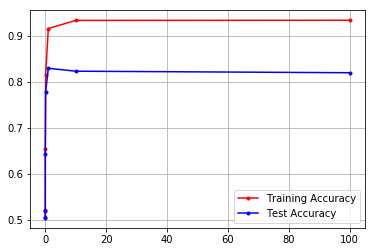

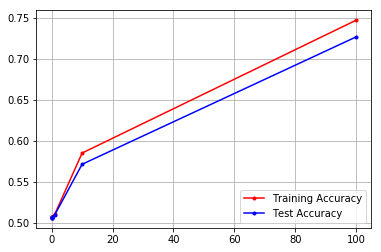

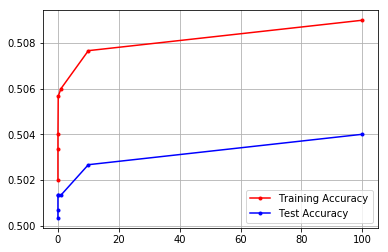

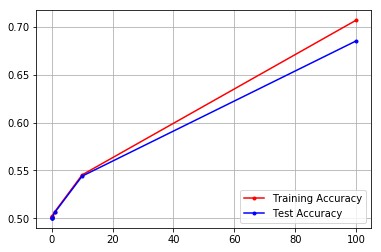

In [9]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
kernel_types = ['linear', 'rbf', 'poly', 'sigmoid']
for kern in kernel_types:
    print(kern.upper() + " Kernel SVM:")
    acc_training = []
    acc_testing = []
    for val in c_values:
        acc_tr, acc_te = svm_machine_run(val, kern)
        acc_training.append(acc_tr)
        acc_testing.append(acc_te)
        print("C:", val, '-', 'Training accuracy:', acc_tr)
        print("C:", val, '-', 'Testing accuracy:', acc_te)
        print()
    plt.figure()
    plt.plot(c_values, acc_training, 'r.-') 
    plt.plot(c_values, acc_testing,'b.-') 
    plt.grid()
    plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
    print()